Ques 1 ------>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def backward_substitution(A,b):
    n= len(b)
    x=[0,0,0]

    for i in range(n-1,-1,-1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

In [3]:
def Gaussian_elimination(A, B):

    n=len(A)

    for i in range(n):
        A[i].append(B[i])
    j=0
    i=0
    for i in range(n):
        diag=A[i][j]
        
        if(diag==0):
            for k in range(i+1,n):
                if(A[k][j]!=0):
                    A[i],A[k]=A[k],[A[i]]
                    break
            if(A[i][j]==0):
                j+=1
                continue
            
        # A[i]=A[i]/A[i][j]
        for k in range(i+1,n):
            replaced=-A[k][j] / A[i][j]

            for  l in range(j,n+1):
                A[k][l]+=A[i][l]*replaced


        j+=1

    # print(A)
    new_A = np.array([row[:-1] for row in A])
    new_B = np.array([row[-1] for row in A])
    return backward_substitution(new_A,new_B)



In [4]:
A=[[2,3,-1],[4,4,-3],[-2,3,-1]]
B=[5,3,1]

x=Gaussian_elimination(A,B)

print("The Solution is:- x = ",x[0], " y = ",x[1]," z = ",x[2] )

The Solution is:- x =  1.0  y =  2.0  z =  3.0


Ques 2

In [5]:
def spectral_rad(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    spectral_rad = max(abs(eigenvalues))
    return spectral_rad

def check_convergence_jacobi(A):
    n = len(A)
    
    # Splitting A into D, L, and U
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    
    # Compute M = D^(-1) * (L + U)
    M = np.matmul(np.linalg.inv(D), L + U)
    
    # Compute the spectral radius of M
    Rm = spectral_rad(M)
    
    if Rm < 1:
        print(f"The spectral radius of M is {Rm}, which is less than 1. The Jacobi method is expected to converge.")
    else:
        print(f"The spectral radius of M is {Rm}, which is greater than or equal to 1. The Jacobi method may not converge.")

In [6]:
def jacobi_method(A, b, initial_guess, max_iterations=500, tolerance=0.00001):
    n = len(A)
    x = initial_guess.copy()
    x_new = np.zeros(n)
    
    convergence_data = []

    for k in range(max_iterations):
        for i in range(n):
            sum_term = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - sum_term) / A[i][i]
        
        error = np.linalg.norm(x_new - x)
        convergence_data.append(error)
        
        if error < tolerance:
            return x_new, convergence_data
        
        x = x_new.copy()
    

        
    check_convergence_jacobi(A)
    return x, convergence_data

The spectral radius of M is 3.9481264503524685, which is greater than or equal to 1. The Jacobi method may not converge.


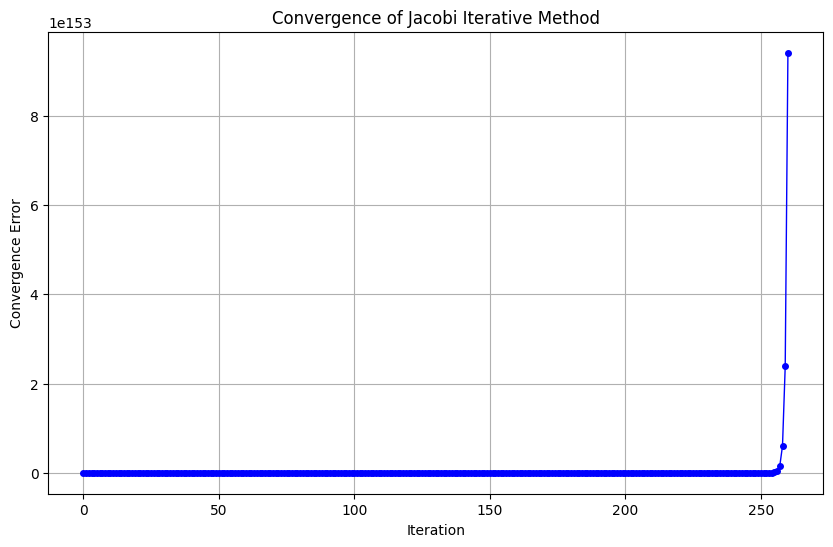

Solution: [ 2.91738076e+296 -2.48739130e+296 -2.05174628e+296]


In [7]:
A = np.array([[2.412, 9.879, 1.564],
              [1.876, 2.985, -11.62],
              [12.214,  2.367, 3.672]])

b = np.array([4.89, -0.972,  7.814])

# A = np.array([[10, -1, 2],
#               [-1, 11, -1],
#               [2, -1, 10]])

# b = np.array([6, 25, -11])
initial_guess = np.zeros(3)

solution, convergence_data = jacobi_method(A, b, initial_guess)

plt.figure(figsize=(10, 6))
plt.plot(convergence_data, '-o', color='b', markersize=4, linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Convergence Error')
plt.title('Convergence of Jacobi Iterative Method')
plt.grid(True)
plt.show()
print("Solution:", solution)

Ques 3

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# import sklearn.datasets
# from sklearn.preprocessing import PolynomialFeatures

In [9]:
import sklearn.datasets
from sklearn.preprocessing import PolynomialFeatures

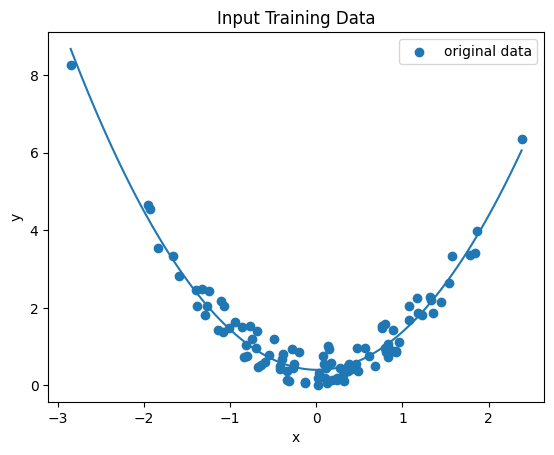

In [10]:
# Create the original observations
orig_X,_ = sklearn.datasets.make_regression(n_samples=100,n_features=1,noise=5)
poly = PolynomialFeatures(degree=2, include_bias=False)
# Transform the features into second order polynomial features
xx_ = poly.fit_transform(orig_X)
# Extract the predictors and the values from the manufactured data
X = [i[0] for i in xx_]
Y_gt = [i[1] for i in xx_]
noise = np.random.uniform(size=(len(Y_gt)))
# Add some noise to the ground truth values
Y_gt += noise
# Shape the ground truth values for use with the model
Y_gt = np.reshape(Y_gt,(-1,1))

# Formulate the system of linear equations as Ax = Y
A = np.column_stack((np.square(X),X, np.ones_like(X)))
Y = Y_gt


# Perform QR decomposition
Q, R = np.linalg.qr(A)

# Solve the system using QR decomposition
coefficients = np.linalg.solve(R, np.dot(Q.T, Y))

# Extract the coefficients
a, b, c = coefficients

# Plot the input data
plt.scatter(X,Y_gt,label="original data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Training Data")
# plt.show()
# Plot the fitted quadratic polynomial
x_values = np.linspace(min(X), max(X), 100)
y_values = a * (x_values**2) + b * x_values + c
plt.plot(x_values, y_values)
plt.legend()
plt.show()

# print(f"The fitted quadratic polynomial is: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

part (c)

In [11]:
# Verify the conditions

# 1. Verify Q^T * Q = I
I = np.eye(Q.shape[1])
QTQ = np.dot(Q.T, Q)
cond1 = np.allclose(QTQ, I)

# 2. Verify Q * R ≈ A
QR = np.dot(Q, R)
cond2 = np.allclose(QR, A)  

print(f"Condition 1 :Q^T * Q = I verified: {cond1}")
print(f"Condition 2 :Q * R = A verified: {cond2}")

Condition 1 :Q^T * Q = I verified: True
Condition 2 :Q * R = A verified: True
